In [8]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from NN_library.ConvNet.ConvNet_uniform import *
from NN_library.ConvNet.train_ConvNet import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

Using device: cuda
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
data = dataset_uniform()
loaders = get_loaders(data, 16)
geometry, damage, imp_shrinkage, obs_shrinkage, stiffness = data.__getitem__(32)

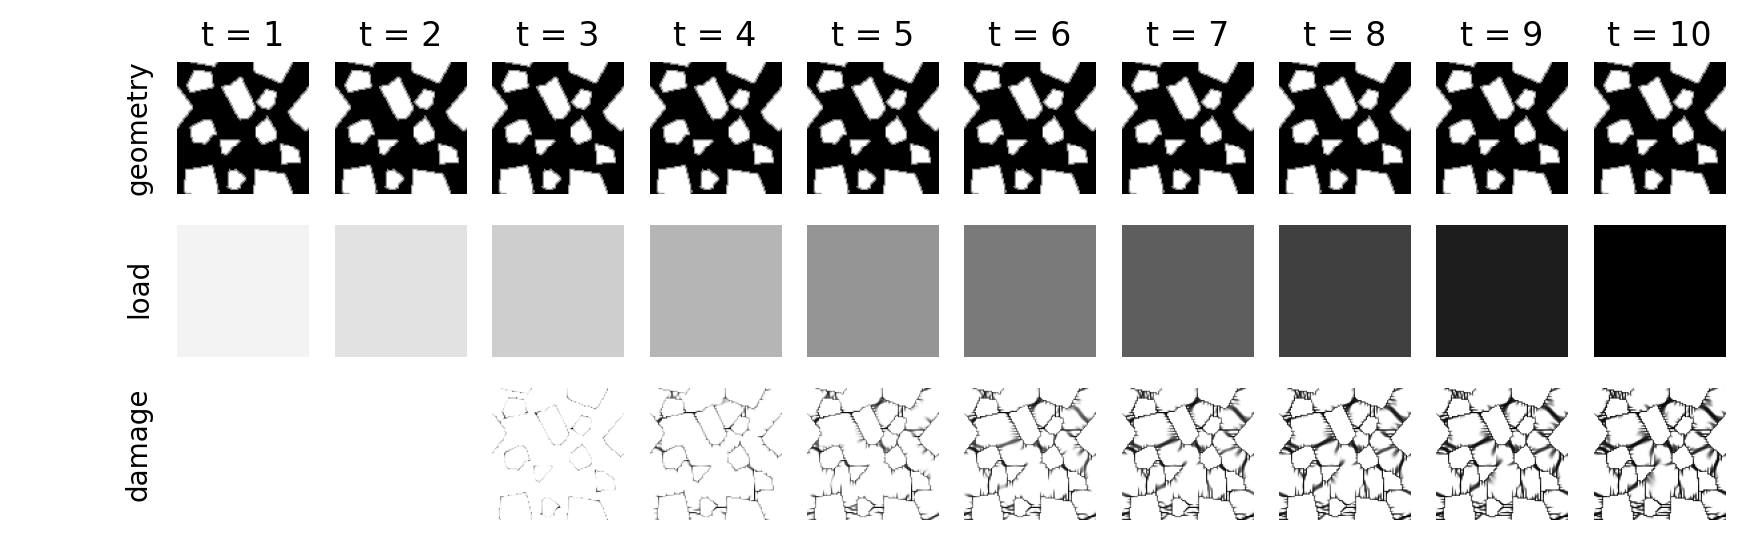

In [10]:
fig, axs = plt.subplots(nrows=3, ncols=11, figsize=(11, 3), dpi=200)
for i in range(10):
    axs[0,i+1].imshow(geometry[0], cmap='Greys', vmin=0, vmax=1)
    axs[0,i+1].set_title(f't = {i+1}')
    axs[0,i+1].set_axis_off()
    axs[1,i+1].imshow(imp_shrinkage[i+1] / (-0.001), cmap='Greys', vmin=0, vmax=1)
    axs[1,i+1].set_axis_off()
    axs[2,i+1].imshow(damage[i], cmap='Greys')
    axs[2,i+1].set_axis_off()
axs[0,0].text(0.8, 0.05, 'geometry', rotation='vertical')
axs[0,0].set_axis_off()
axs[1,0].text(0.8, 0.35, 'load', rotation='vertical')
axs[1,0].set_axis_off()
axs[2,0].text(0.8, 0.2, 'damage', rotation='vertical')
axs[2,0].set_axis_off()

In [21]:
name = 'NN_library/ConvNet/ConvNet_uniform'
args = {'lr' : 0.000001, 'epochs' : 50, 'dev' : dev, 'name' : name}

In [14]:
net = ConvNet(16)

In [15]:
torch.cuda.empty_cache() 

In [16]:
total_params = sum(p.numel() for p in net.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 411042


In [14]:
net = load_network(net, args['name'], args)

In [22]:
losses_train, losses_val = train(net, loaders, args)

Epoch: 0 batch: 0 mean train loss:  0.0016457188
Epoch: 0 batch: 100 mean train loss:  0.0015470217
Epoch: 0 batch: 200 mean train loss:  0.0015508674
Epoch: 0 batch: 300 mean train loss:  0.0018877560
Epoch: 0 batch: 400 mean train loss:  0.0016217771
Epoch: 0 batch: 500 mean train loss:  0.0017322845
Epoch: 0 batch: 600 mean train loss:  0.0021480280
Epoch: 0 batch: 700 mean train loss:  0.0020013865
Epoch: 0 mean train loss:  0.0016631098 mean val. rec. loss:  0.0017450671
Epoch: 1 batch: 0 mean train loss:  0.0013728675
Epoch: 1 batch: 100 mean train loss:  0.0015349327
Epoch: 1 batch: 200 mean train loss:  0.0015221730
Epoch: 1 batch: 300 mean train loss:  0.0014616793
Epoch: 1 batch: 400 mean train loss:  0.0017671815
Epoch: 1 batch: 500 mean train loss:  0.0010972124
Epoch: 1 batch: 600 mean train loss:  0.0016682046
Epoch: 1 batch: 700 mean train loss:  0.0017584252
Epoch: 1 mean train loss:  0.0016560888 mean val. rec. loss:  0.0017549101
Epoch: 2 batch: 0 mean train loss:  0.

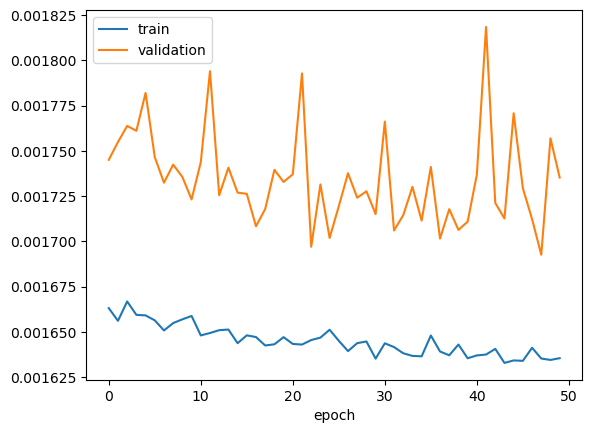

In [23]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])